In [30]:
from tqdm import tqdm_notebook as tqdm

# Lévy sampling of quantum paths

## Free particle

$$\pi(x_k\vert x^{'}, x^{''})\propto\rho^{\text{free}}(x^{'}, x_{k}, \Delta_{\tau})\rho^{\text{free}}(x_{k}, x^{''}, \Delta_{\tau})$$ ... both of which are gaussians

=> Sample directly from a gaussian with **no rejection**

$$\pi(x_k\vert x^{'}, x^{''})\propto e^{-(x_k - <x_k>)^2 / 2\sigma^2}$$ 

where: $$<x_k>=\frac{\Delta_{\tau^{''}}x^{'} + \Delta_{\tau^{'}}x^{''}}{\Delta_{\tau^{''}} + \Delta_{\tau^{'}}}$, $\sigma^2 =(\frac{1}{\Delta_{\tau^{''}}} + \frac{1}{\Delta_{\tau^{'}}})^{-1}$$ and $$\Delta_{\tau} = \beta/N$$

![gauss](figs/gauss_sample.png)

## Particle in a harmonic potential

#### Free Lévy path sampling

For $\beta \rightarrow 0$, Trotter decomposition still produces Gaussians:

$$\rho^{\text{harm}}(x,x^{'}, \beta)=e^{-\beta x^2/4}\rho^{\text{free}}(x,x^{'}, \beta)e^{-\beta x^{'2}/4}$$

General analytical formula, using exact solution from harmonic oscillator density matrix:

$$\rho^{\text{harm}}(x,x^{'}, \beta)= c(\beta)e^{-g(\beta) (x-x^{'})^2/2}e^{-f(\beta) (x+x^{'})^2/2}$$

#### Harmonic Lévy path sampling

Expanding from Trotter and rearranging terms yields:

$$\pi(x_k\vert x^{'}, x^{''})\propto e^{-(x_k - <x_k>)^2 / 2\sigma^2}$$ 

where:

$\sigma = \Upsilon_1^{-1/2}$

$<x_k> = \Upsilon_1/\Upsilon_2$

$\Upsilon_1 = \frac{1}{\tanh(d\tau)} + \frac{1}{\tanh(d\tau^{'})}$

$\Upsilon_2 = \frac{x^{'}}{\sinh(d\tau)} + \frac{x^{''}}{\sinh(d\tau^{'})}$

$d\tau=\beta/N$ and $d\tau^{'}=(N-k)d\tau$


![levy_harm](figs/harm_Levy.png)

### Lévy path with a return condition

Otherwise it is a just a gaussian random walk

In [27]:
import math, random, pylab

beta = 2.0
N = 50
dtau = beta / N
nsteps = 5
xstart, xend = -1.0, 2.0
x = [xstart]

for k in range(1, N):
    dtau_prime = (N - k) * dtau
    Ups1 = 1.0 / math.tanh(dtau) + \
           1.0 / math.tanh(dtau_prime)
    Ups2 = x[k - 1] / math.sinh(dtau) + \
           xend / math.sinh(dtau_prime)
    x.append(random.gauss(Ups2 / Ups1, \
             1.0 / math.sqrt(Ups1)))
# for plotting
x.append(xend)

Path is constrained by x0, xN and oscillator strength of the potential

(-2.0, 4.0)

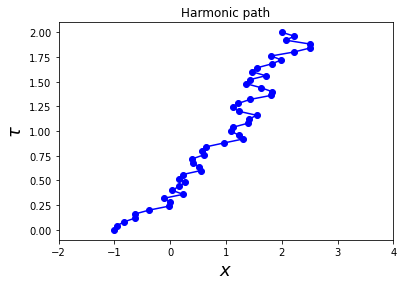

In [28]:
pylab.plot(x, [j * dtau for j in range(N + 1)], 'bo-')
pylab.xlabel('$x$', fontsize=18)
pylab.ylabel('$\\tau$', fontsize=18)
pylab.title('Harmonic path')
pylab.xlim(-2.0, 4.0)

### Lévy sampling of straight paths

In [80]:
import math, random, pylab

def levy_harmonic_path(xstart, xend, dtau, N):
    '''
    Harmonic Lévy path sampling
    '''
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20
N = 80
dtau = beta / N
n_steps = 50000
data = []
sigma = 1.0 / math.sqrt(2.0 * math.tanh(beta / 2.0))
xs = []
for step in tqdm(range(n_steps)):
    x_0 = random.gauss(0.0, sigma)
    x = levy_harmonic_path(x_0, x_0, dtau, N)
    #k = random.randint(0, N - 1) # pas vraiment necessaire, on pourrait prendre tous les x ou n'importe quel indice
    #data.append(x[k])
    
    k = random.randint(0, N - 1) # pas vraiment necessaire, on pourrait prendre tous les x ou n'importe quel indice
    data.append(x[k])
    x += [x_0]
    #for y in x:
    #    data.append(y) #  => meme resultats avec bcp moins de steps
    if step%10000 == 0:
        xs.append(x)

<ipython-input-80-c66a8cb557cf>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm(range(n_steps)):


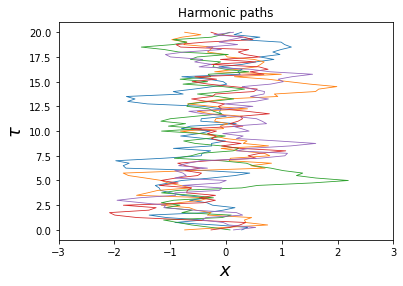

In [81]:
for t in range(len(xs)):
    pylab.plot(xs[t], [j * dtau for j in range(N + 1)], lw=0.8)
    pylab.xlabel('$x$', fontsize=18)
    pylab.ylabel('$\\tau$', fontsize=18)
    pylab.title('Harmonic paths')
    pylab.xlim(-3.0, 3.0)

### Compare Lévy sampling with exact solution for harmonic potential
$\pi(x) = \sqrt{\tanh(\beta/2)/\pi}\exp(-x^2\tanh(\beta/2))$

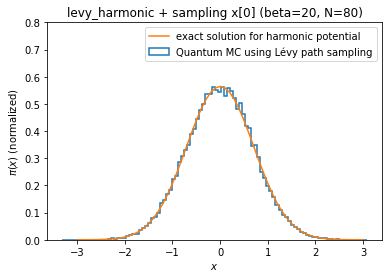

In [82]:
pylab.hist(data, density=True, bins=100, label='Quantum MC using Lévy path sampling', lw=1.5, histtype='step')

list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-xx ** 2 * math.tanh(beta / 2.0)) for xx in list_x]
pylab.plot(list_x, list_y, label='exact solution for harmonic potential')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_harmonic + sampling x[0] (beta=%s, N=%i)' % (beta, N))
#pylab.xlim(-2, 2)
pylab.ylim(0.0, 0.8)
pylab.show()